## 1. Import modules & csv files

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


applications = pd.read_csv("application_record.csv")
credit_hist = pd.read_csv("credit_record.csv")
print(f"Total number of entries: {applications.shape[0]}")
applications.head()

Total number of entries: 438557


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## 2. Pre-processing of application records
Pre-processing done:
- Remove duplicates
- Remove outliers

In [74]:
#Remove duplicate IDs, keep first occurence of that ID
applications.drop_duplicates("ID", keep="first", inplace=True)

In [75]:
# Credit to: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
def remove_outlier_df(df_in, col_name):
    '''
    Remove outliers in a given column from a Pandas dataframe
    Note: Removes the entry corresponding to outlier
    Uses +- 1.5 IQR as criteria
    '''
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

def remove_outlier_series(series_in):
    '''
    Removes outliers from a pandas series
    +- 1.5 IQR as outlier criteria
    '''
    q1 = series_in.quantile(0.25)
    q3 = series_in.quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    series_out = series_in.loc[(series_in > fence_low) & (series_in < fence_high)]
    return series_out

In [76]:
# Remove income outliers. May be useful for data viz.
# Can consider plotting a graph with outliers included and another grpah with outliers excluded
apps = remove_outlier_df(applications, "AMT_INCOME_TOTAL")

apps.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


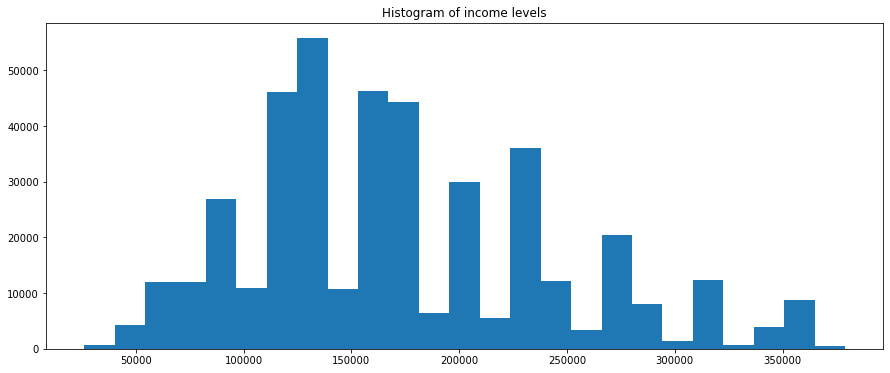

In [77]:
plt.figure(figsize=(15,6))
# plt.hist(applications["AMT_INCOME_TOTAL"], 150)
plt.hist(apps["AMT_INCOME_TOTAL"], 25)
plt.ticklabel_format(style="plain")
plt.title("Histogram of income levels")

plt.show()

Defining income groups (may be useful for data viz?)

In [78]:
# Represents interval between each income group 
# e.g. 50000 means the groups are: <50k, 50k-100k, 100k-150k and so on

INCOME_GROUP_INTERVAL = 50000


# Define income groups. Numbers represent upper limit 
# e.g. 150000 means < 150000 and > 100000 (the previous number in the list)
income_groups = []
income_group_cutoff = INCOME_GROUP_INTERVAL
while income_group_cutoff < apps["AMT_INCOME_TOTAL"].max():
    income_groups.append(income_group_cutoff)
    income_group_cutoff += INCOME_GROUP_INTERVAL
income_groups.append(income_group_cutoff)

print(income_groups)

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]


In [79]:
# app_income_groups = []
# for income in income_groups:
#     income_lower = income - INCOME_GROUP_INTERVAL
#     app_income_groups.append(applications.loc[(applications["AMT_INCOME_TOTAL"]<=income) & 
#                                                   (applications["AMT_INCOME_TOTAL"]>income_lower),
#                                                   ["ID", "AMT_INCOME_TOTAL"]])
#     print(f"Appended {income_lower} to {income}")

## 3. Pre-processing of credit histories
Pre-processing done:
- Assign a "risk score" to each month's credit history record. Higher score means more risk of overdue/default.
    - Step 1: Convert STATUS to range of 0 - 6 based on credit status
    - Step 2: Risk score$={e^{x/e}-1}$, where x = STATUS. The idea is that extreme overdue (e.g. >150 days) is far riskier than 1~29 days overdue

| Credit status                 |STATUS |RISK_SCORE|
|:------------------------------|:------|:---------|
| Paid-off loan or no loan      | 0     | 0        |
| 1 ~ 29 days past due          | 1     | 0.4447   |
| 30 ~ 59 days past due         | 2     | 1.0871   |
| 60 ~ 89 days past due         | 3     | 2.0151   |
| 90 ~ 119 days past due        | 4     | 3.3558   |
| 120 ~ 149 days past due       | 5     | 5.2927   |
| >150 days past due, write-off | 6     | 8.0909   |

- Group entries by ID. Each ID now only has 1 entry instead of multiple entries

In [80]:
#Create a deep copy of credit_hist to avoid affecting original dataframe
credit_hist_grouped = credit_hist.copy(deep=True)

# Replace STATUS "X" and "C" with "-1"
credit_hist_grouped["STATUS"].replace(["X", "C"], "-1", inplace=True)

# Convert from str to int 
credit_hist_grouped["STATUS"] = credit_hist_grouped["STATUS"].astype(int)

# Convert status to risk score for that month
e = 2.718281828 # Euler's number
credit_hist_grouped["RISK_SCORE"] = np.exp((credit_hist_grouped["STATUS"] + 1) / e) - 1

# Remove STATUS column
credit_hist_grouped.drop(["STATUS"], axis=1, inplace=True)

In [81]:
# #Create a deep copy of credit_hist to avoid affecting original dataframe
# credit_hist_grouped = credit_hist.copy(deep=True)

# # Replace STATUS "X" and "C" with "0" i.e. paid off loan and no loan are considered good behaviour (STATUS 0)
# credit_hist_grouped["STATUS"].replace(["X", "C"], "0", inplace=True)

# #Change STATUS froms tring to int
# credit_hist_grouped["STATUS"] = credit_hist_grouped["STATUS"].astype(int)

# #Replace STATUS "0", "1" ... "5" with "1" i.e. any overdue behaviour, no matter how long, is considered bad behaviour (STATUS 1)
# credit_hist_grouped.loc[credit_hist_grouped["STATUS"]>=1, "STATUS"] = 1

In [82]:
#Visualize some of the entries
credit_hist_grouped.iloc[215:250,:]

,ID,MONTHS_BALANCE,RISK_SCORE
215,5001719,-34,0.000000
216,5001719,-35,0.000000
217,5001719,-36,0.000000
218,5001719,-37,0.000000
219,5001719,-38,0.000000
220,5001719,-39,0.000000
221,5001719,-40,0.000000
222,5001719,-41,0.444668
223,5001719,-42,0.444668
224,5001720,0,1.087065


In [83]:
# Record how many months ago was that particular record for, in terms of positive numbers (e.g. 1 month ago, 2 months ago)
credit_hist_grouped["MONTHS_AGO"] = credit_hist_grouped["MONTHS_BALANCE"] * -1

# Remove MONTHS_BALANCE column
credit_hist_grouped.drop(["MONTHS_BALANCE"], axis=1, inplace=True)

In [84]:
# Collapse credit_hist, by grouping all the entries with the same ID together. 
# For MONTHS_AGO we take the max value amongst all entries with the same ID. 
# For RISK_SCORE we take average across all months for that person.

credit_hist_agg = credit_hist_grouped.groupby(["ID"]).agg(
    {
        "RISK_SCORE": "mean",
        "MONTHS_AGO": max
    }
)

In [85]:
# Record if the person has history of voerdue or not
credit_hist_agg["HAS_OVERDUE"] = (credit_hist_agg["RISK_SCORE"] > 0).astype(int)
credit_hist_agg.head(20)

,RISK_SCORE,MONTHS_AGO,HAS_OVERDUE
ID,,,
5001711,0.333501,3,1
5001712,0.234036,18,1
5001713,0.000000,21,0
5001714,0.000000,14,0
5001715,0.000000,59,0
5001717,0.343607,21,1
5001718,0.329389,38,1
5001719,0.020682,42,1
5001720,0.569578,35,1


In [86]:
# CREDIT_HIST_LEN records the length of their credit history
credit_hist_agg["CREDIT_HIST_LEN"] = credit_hist_agg["MONTHS_AGO"] + 1

# Remove MONTHS_AGO column
credit_hist_agg.drop(["MONTHS_AGO"], axis=1, inplace=True)

credit_hist_agg.head(10)

,RISK_SCORE,HAS_OVERDUE,CREDIT_HIST_LEN
ID,,,
5001711,0.333501,1,4
5001712,0.234036,1,19
5001713,0.000000,0,22
5001714,0.000000,0,15
5001715,0.000000,0,60
5001717,0.343607,1,22
5001718,0.329389,1,39
5001719,0.020682,1,43
5001720,0.569578,1,36


## 4. Merge the two dataframes together
In essence, attaching the credit status & credit history length to each individual's profile.

Only keep rows with IDs that appear in both application record and credit history 
- i.e. if a person has an application record but no credit history, we discard that entry

In [87]:
# Merge the two dataframes together
apps_merged = pd.merge(applications, credit_hist_agg, how="inner", on="ID")

apps_merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,RISK_SCORE,HAS_OVERDUE,CREDIT_HIST_LEN
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0.095733,1,16
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0.102116,1,15
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0.103756,1,30
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0.177867,1,5
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0.000000,0,27


In [88]:
# Now we have 36457 entries in total
apps_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [89]:
# Remove OCCUPATION_TYPE as it has many null values, as can be seen from the info() above
# 36547 rows but OCCUPATION_TYPE has only 25134 non-null values
apps_merged.drop(["OCCUPATION_TYPE"], axis=1, inplace=True)

In [90]:
apps_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

## 5. Data visualisation

### Distributions of variables

#### Genders

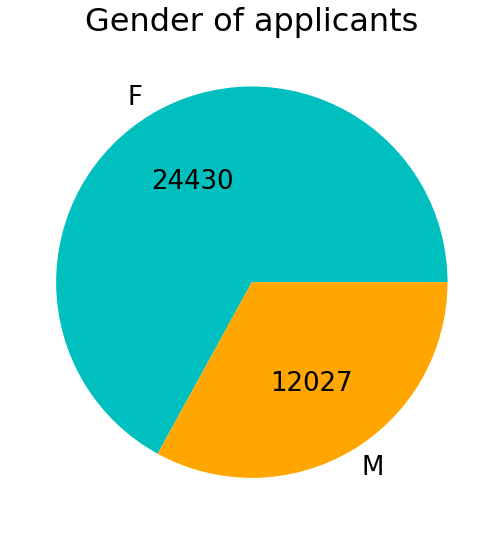

In [91]:
gender_counts = apps_merged["CODE_GENDER"].value_counts()
plt.figure(figsize=(9,9))
plt.pie(gender_counts, 
        labels=["F", "M"],
        autopct= lambda x: f"{int(((x/100)*gender_counts.sum()).round())}",
        colors=["c", "#ffa600"],
        textprops={'fontsize': 26}
       )
plt.title("Gender of applicants",
          fontdict={"fontsize": 32}
         )

plt.show()

#### Income levels

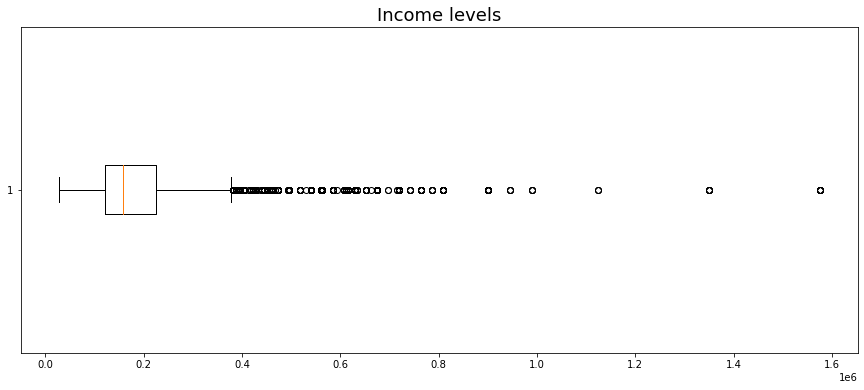

In [92]:
plt.figure(figsize=(15,6))
plt.boxplot(apps_merged["AMT_INCOME_TOTAL"], vert=False)
plt.title("Income levels",
          fontdict={"fontsize":18}
         )

plt.show()

From the above box plot, we can see that there are several outliers in the annual income category

In [93]:
#Remove outliers in the income category
income_new = remove_outlier_series(apps_merged["AMT_INCOME_TOTAL"])

In [94]:
# plt.figure(figsize=(15,6))
# plt.boxplot(income_new, vert=False)

Plot histogram of income levels (outliers removed)

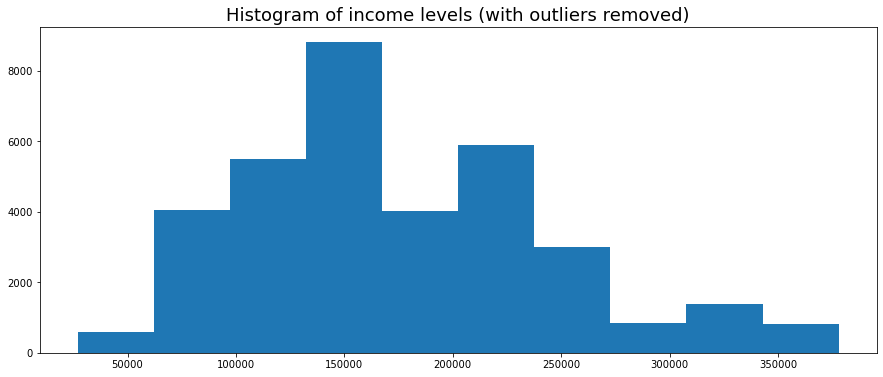

In [95]:
plt.figure(figsize=(15,6))
# plt.hist(applications["AMT_INCOME_TOTAL"], 150)
plt.hist(income_new, 10)
plt.ticklabel_format(style="plain")
plt.title("Histogram of income levels (with outliers removed)",
          fontdict={"fontsize": 18}
         )

plt.show()

Number of children

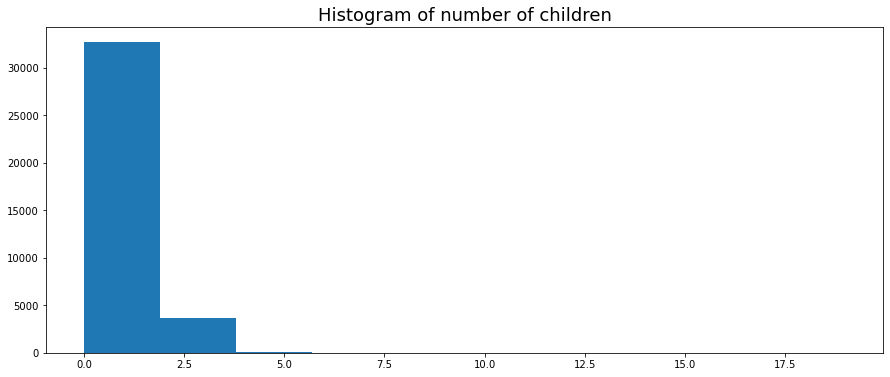

In [96]:
plt.figure(figsize=(15,6))
# plt.hist(applications["AMT_INCOME_TOTAL"], 150)
plt.hist(apps_merged["CNT_CHILDREN"])
plt.title("Histogram of number of children",
          fontdict={"fontsize": 18}
         )

plt.show()

Clearly, the number of children for some entries seem to be incorrect, as some entries seem to have >10 children

In [97]:
# Remove erroneous data from "CNT_CHILDREN" category.
# Criteria: If an entry has >5 children, treat as erroneous data
# Counts the number of applicants with 0,1,...,5 children
num_children = apps_merged["CNT_CHILDREN"].value_counts()
num_children = num_children.loc[num_children.keys() <= 5]

print(num_children)

0    25201
1     7492
2     3256
3      419
4       63
5       20
Name: CNT_CHILDREN, dtype: int64


[Text(0, 0, '25201'),
 Text(0, 0, '7492'),
 Text(0, 0, '3256'),
 Text(0, 0, '419'),
 Text(0, 0, '63'),
 Text(0, 0, '20')]

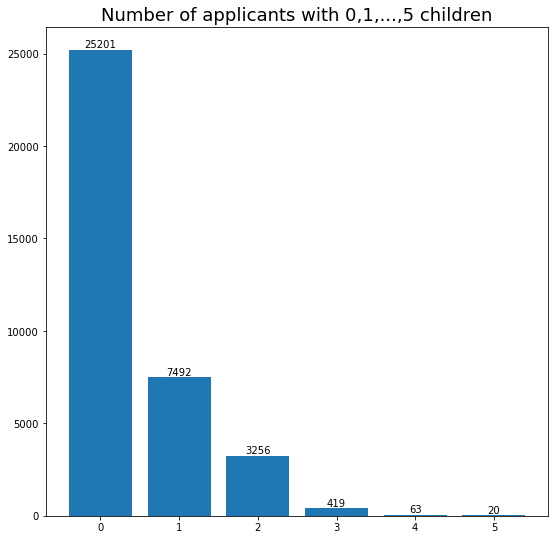

In [99]:
#Plot with subplots as we need to add the numerical values to bar chart
fig, ax = plt.subplots(figsize=(9,9))
bars = ax.bar(num_children.keys(), num_children)
plt.title("Number of applicants with 0,1,...,5 children",
          fontdict={"fontsize": 18}
         )
ax.bar_label(bars)

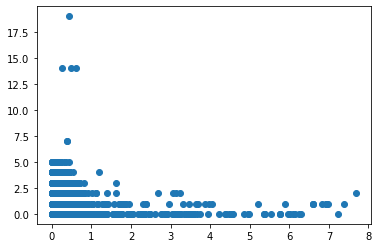

In [101]:
plt.scatter(apps_merged["RISK_SCORE"], apps_merged["CNT_CHILDREN"])

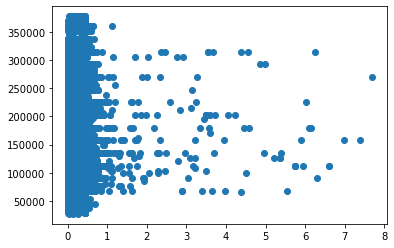

In [102]:
new_df = remove_outlier_df(apps_merged, "AMT_INCOME_TOTAL")
plt.scatter(new_df["RISK_SCORE"], new_df["AMT_INCOME_TOTAL"])

(array([  65.,  694., 1103., 2571., 2402., 1707., 1318.,  333.,  650.,
         419.]),
 array([ 30150.,  64935.,  99720., 134505., 169290., 204075., 238860.,
        273645., 308430., 343215., 378000.]),
 <BarContainer object of 10 artists>)

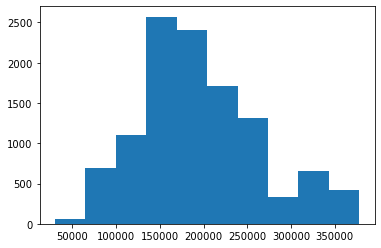

In [103]:
plt.hist(new_df.loc[new_df["CODE_GENDER"]=="M", "AMT_INCOME_TOTAL"])

(array([ 546., 3464., 4276., 6098., 2612., 3362.,  783., 1345.,  788.,
         392.]),
 array([ 27000.,  61650.,  96300., 130950., 165600., 200250., 234900.,
        269550., 304200., 338850., 373500.]),
 <BarContainer object of 10 artists>)

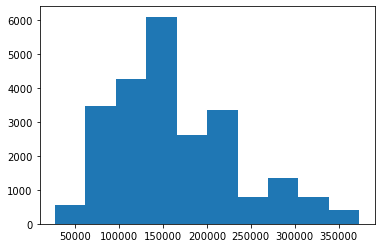

In [104]:
plt.hist(new_df.loc[new_df["CODE_GENDER"]=="F", "AMT_INCOME_TOTAL"])